In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
scgpt_dir = "/lustre/groups/ml01/workspace/leander.dony/projects/cellflow/250302_scGPT/metrics/"

In [3]:


split_to_splitname = {"comboseen0": "double_seen_0", "comboseen1": "double_seen_1", "comboseen2": "double_seen_2", "unseensingle": "single"}
splits = split_to_splitname.keys()
seeds = np.arange(1,6)

dfs = []
for split in splits:
    for seed in seeds:
        file = f"metrics_scgpt_seed{seed}_{split}.csv"
        df = pd.read_csv(os.path.join(scgpt_dir, file), index_col=0)
        df = df.drop("mean")
        df["condition"] = df.index
        df["subgroup"] = split_to_splitname[split]
        df["seed"] = seed
        df["model"] = "scgpt"
        dfs.append(df)


In [4]:
dfs[0]

,deg_ood_r_squared,deg_ood_sinkhorn_div_1,deg_ood_sinkhorn_div_10,deg_ood_sinkhorn_div_100,deg_ood_e_distance,deg_ood_mmd,encoded_ood_r_squared,encoded_ood_sinkhorn_div_1,encoded_ood_sinkhorn_div_10,encoded_ood_sinkhorn_div_100,...,decoded_ood_r_squared,decoded_ood_sinkhorn_div_1,decoded_ood_sinkhorn_div_10,decoded_ood_sinkhorn_div_100,decoded_ood_e_distance,decoded_ood_mmd,condition,subgroup,seed,model
C3orf72+FOXL2,-1729.477181,0.103875,0.103764,0.103715,0.207506,0.113917,0.259568,43.320667,32.857693,11.594604,...,0.978823,278.496399,261.800720,112.902298,32.672537,0.260947,C3orf72+FOXL2,double_seen_0,1,scgpt
CBL+PTPN9,0.935458,21.307230,8.511042,4.943432,9.216880,0.507432,0.483238,32.962967,21.703369,8.933323,...,0.986007,209.896759,186.381180,32.682007,21.942280,0.237006,CBL+PTPN9,double_seen_0,1,scgpt
CDKN1B+CDKN1A,0.898057,11.398080,7.532943,6.237947,12.156491,0.568940,-0.092903,39.111946,28.314693,15.225273,...,0.975166,188.386948,168.040375,39.488037,39.172682,0.221209,CDKN1B+CDKN1A,double_seen_0,1,scgpt
CDKN1C+CDKN1A,0.869637,12.801075,9.375860,8.402823,16.570693,0.589771,-0.137575,37.486691,26.910528,16.134731,...,0.971161,197.241074,177.525269,49.980743,46.355813,0.232131,CDKN1C+CDKN1A,double_seen_0,1,scgpt
CDKN1C+CDKN1B,0.844873,7.872290,5.601754,4.818233,9.443891,0.541617,0.069335,38.305470,27.034065,11.592424,...,0.979068,198.300079,178.834991,49.133194,32.996692,0.228147,CDKN1C+CDKN1B,double_seen_0,1,scgpt
CEBPB+OSR2,0.624864,42.164112,27.937542,20.695238,38.830785,0.590227,0.093677,77.683769,63.490032,38.493732,...,0.951971,318.596039,296.319153,109.584732,81.208718,0.273260,CEBPB+OSR2,double_seen_0,1,scgpt
DUSP9+PRTG,0.683316,31.200771,20.670637,19.086866,37.921875,0.576256,0.057523,46.957012,35.408207,23.665714,...,0.959995,254.368637,230.849701,57.945236,65.318464,0.280081,DUSP9+PRTG,double_seen_0,1,scgpt
FOXL2+MEIS1,0.981738,11.173820,3.607512,2.020514,3.712583,0.416027,0.442211,37.217381,24.341793,7.684345,...,0.987514,265.594330,243.788391,64.158661,20.654722,0.261291,FOXL2+MEIS1,double_seen_0,1,scgpt
JUN+CEBPB,0.000000,0.062020,0.061416,0.061346,0.122732,0.067376,0.123781,80.212074,67.728050,39.214092,...,0.940040,406.923737,390.894562,221.933029,98.248321,0.313993,JUN+CEBPB,double_seen_0,1,scgpt


In [5]:
df_scgpt = pd.concat(dfs)

In [6]:
df_scgpt.shape[0] * 4

2244

In [7]:
res = pd.read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/norman_2/results/allocation/results_norman_prelim2.csv", index_col=0)

In [8]:
res.head()

,subgroup,condition,encoded_ood_r_squared,encoded_ood_sinkhorn_div_1,encoded_ood_sinkhorn_div_10,encoded_ood_sinkhorn_div_100,encoded_ood_e_distance,encoded_ood_mmd,decoded_ood_r_squared,decoded_ood_e_distance,...,deg_ood_sinkhorn_div_1,deg_ood_sinkhorn_div_10,deg_ood_sinkhorn_div_100,deg_ood_e_distance,deg_ood_mmd,seed,model,decoded_ood_sinkhorn_div_1,decoded_ood_sinkhorn_div_10,decoded_ood_sinkhorn_div_100
0,double_seen_1,AHR+KLF1,-0.235969,26.363504,20.453796,13.004532,23.576266,0.088512,0.965454,59.965783,...,49.004730,23.053215,9.580486,18.465538,0.055382,1,biolord,NaN,NaN,NaN
1,single,ARID1A+ctrl,-0.870820,32.711014,26.043972,15.835747,26.292580,0.075837,0.957185,65.454483,...,51.148735,24.314388,9.643890,18.312755,0.052491,1,biolord,NaN,NaN,NaN
2,double_seen_1,BCL2L11+BAK1,0.912641,8.554052,2.861893,0.661819,0.830657,0.019190,0.984661,25.525600,...,40.841179,14.373302,0.673000,0.470072,0.452304,1,biolord,NaN,NaN,NaN
3,double_seen_1,BCL2L11+TGFBR2,0.863316,9.772830,4.568264,0.941708,1.115361,0.019349,0.985263,24.123491,...,38.525169,14.326378,1.011749,1.303958,0.060637,1,biolord,NaN,NaN,NaN
4,single,BCL2L11+ctrl,0.888504,9.687116,4.609301,0.755690,0.728787,0.016104,0.986481,22.218412,...,39.652954,13.896275,0.832378,0.833630,0.280454,1,biolord,NaN,NaN,NaN


In [9]:
df_all = pd.concat((res, df_scgpt))

In [10]:
df_all.shape

(2869, 22)

In [11]:
import seaborn as sns

<Axes: xlabel='model', ylabel='decoded_ood_r_squared'>

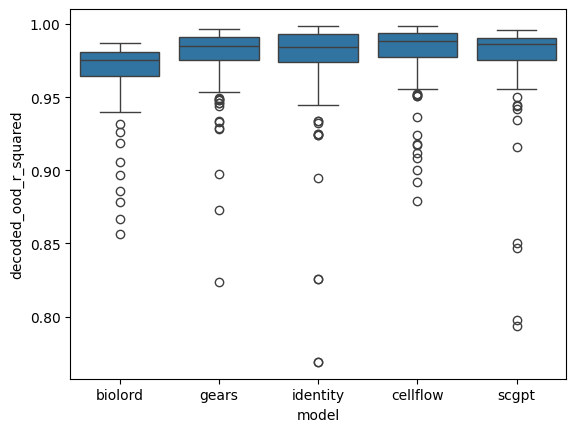

In [12]:
sns.boxplot(df_all[df_all["subgroup"]=="single"], x="model", y="decoded_ood_r_squared")

<Axes: xlabel='model', ylabel='encoded_ood_e_distance'>

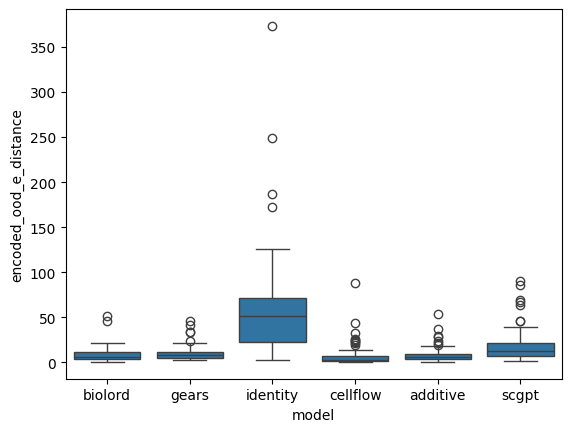

In [13]:
sns.boxplot(df_all[df_all["subgroup"]=="double_seen_2"], x="model", y="encoded_ood_e_distance")

In [14]:
df_all["model"].value_counts()

model
biolord     561
gears       561
identity    561
cellflow    561
scgpt       561
additive     64
Name: count, dtype: int64

In [16]:
df_all.to_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/norman_2/results/allocation/norman_results_all.csv")